### Target Customer Class


* The data is provided by a brand store situated in a shopping mall. The store is
planning to attract more customers and targeting the old customer group which is more likely
to purchase products from store.
The format of data


1. ID – Unique customer identifier
2. Sex – Gender of customer (0-male, 1-female)
3. Marital status – Marital status of customer (0-single, 1-married/divorced/widowed)
4. Age – Age of customer in years
5. Education – Level of education of customer (0-unknown, 1-high school, 2-university,
3-graduate school)
6. Income – Self reported annual income in US dollar.
7. Occupation – Category of occupation. (0-unemployed/unskilled, 1-skilled/official, 2-
management/self employed/officer)
8. Settlement size – Size of the city that customer lives in.(0-small, 1-medium, 2-big)
What you have to perform?
1. Do the exploratory data analysis.
2. Find the customer group by cluster analysis to target for marketing team

Importing the necessary libraries

In [2]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
#Import the numpy library for mathematical operations and array manipulation.
import numpy as np
#Import the matplotlib library for data visualization
import matplotlib.pyplot as plt
#Import the seaborn library for enhanced data visualization.
import seaborn as sns
#Import the StandardScaler class from scikit-learn for feature scaling.
from sklearn.preprocessing import StandardScaler
#Import the KMeans class from scikit-learn for k-means clustering.
from sklearn.cluster import KMeans
#Import the silhouette_score function from scikit-learn for evaluating cluster quality.
from sklearn.metrics import silhouette_score

Read the CSV file 'mall_customer.csv' and loads it into a pandas DataFrame called **data**

In [3]:
data = pd.read_csv('mall_customer.csv')

Print the **descriptive statistics** of the DataFrame data, including count, mean, standard deviation, minimum, quartiles, and maximum values for each column.

In [4]:
print(data.describe())

                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

In [21]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1


Calculate the correlation coefficients between **columns** in the DataFrame data and assigns the result to **corr_matrix**

In [5]:
corr_matrix = data.corr()

Create a heatmap using the correlation matrix corr_matrix  using the seaborn library. The   **annot=True** argument adds **numeric values** to the **heatmap**, and **cmap='coolwarm'** sets the **color scheme**.

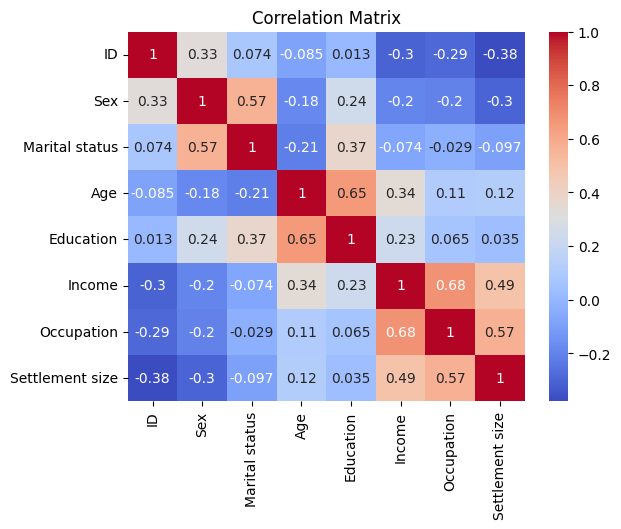

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Analyzing the above correlation matrix :

* The ID column is a unique identifier for each customer, so it doesn't have any meaningful correlation with other variables.
* The correlation coefficient between 'Sex' and 'Marital Status' is 0.57 (moderate).
* 'Income' , 'Occupation' and 'Seetelment Size' have negative correlation with 'marital status' but almost dosen't affect that much.
* Age' and 'Education' have good positive correlation 0.65 means it is a important factor.
* 'Income' and 'Occupation' has positive correlation of 0.68 means they well and good correlated to each.
* 'Income' has a weak negative correlation with 'ID' (-0.3) and a weak positive correlation with 'Education' (0.23) and 'Occupation' (0.49).
* 'Occupation' Linearly (positively) affect at moderate level the 'Settlement Size' , indeed 'Marital Status' is negligibly correlated.

Plot various visualizations for different categorical and numeric columns of the data DataFrame.

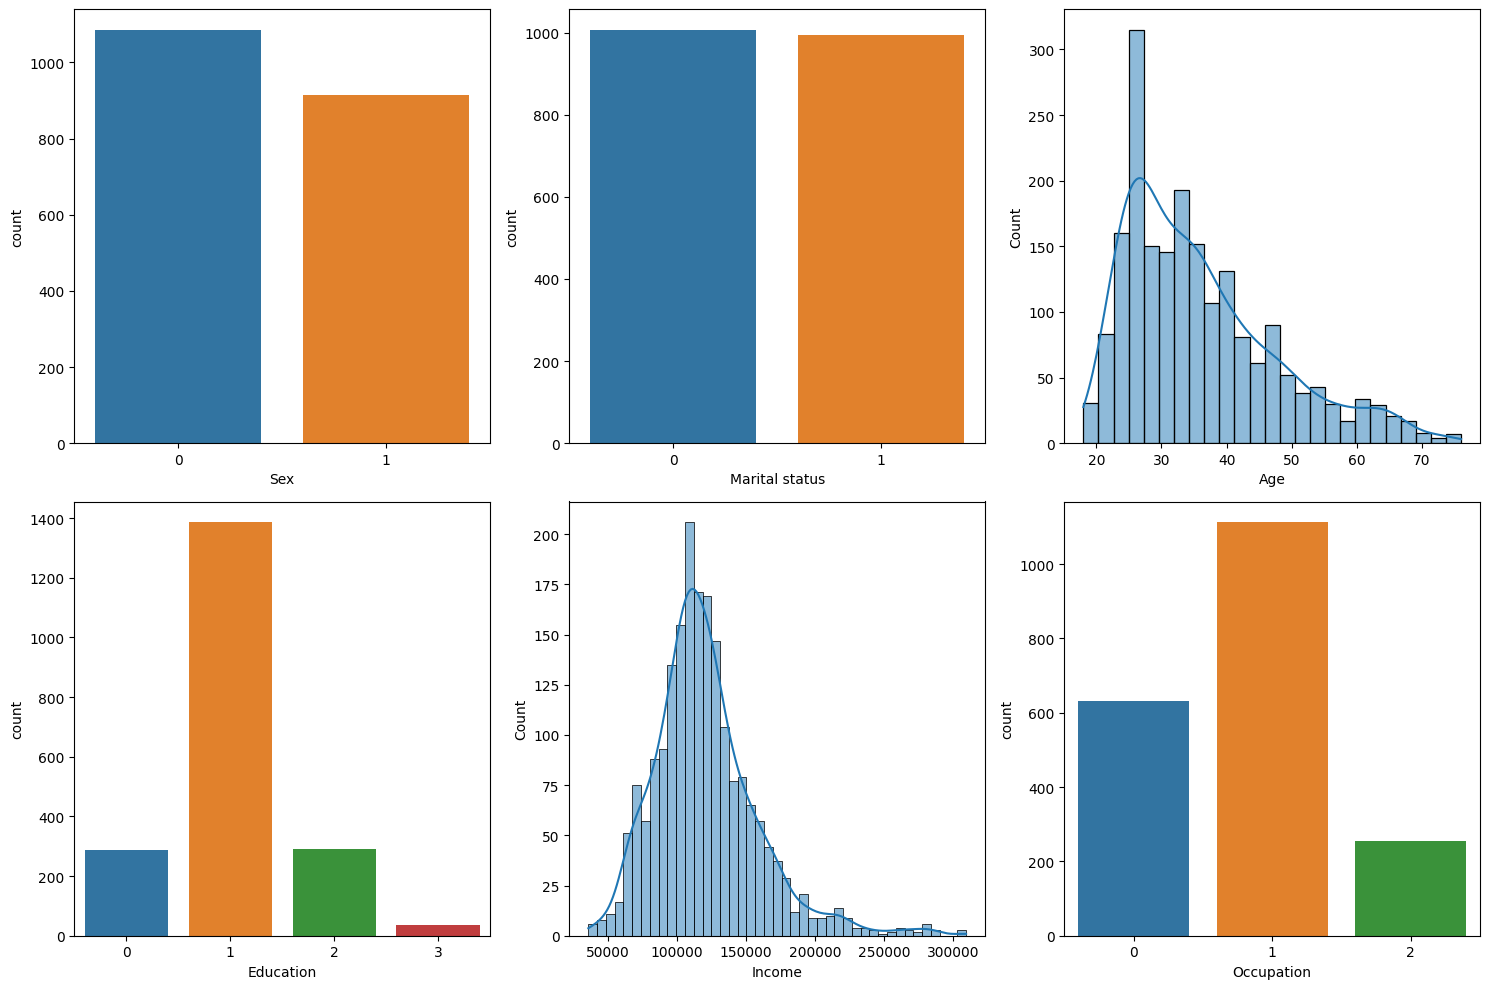

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
sns.countplot(x='Sex', data=data, ax=axes[0, 0])
sns.countplot(x='Marital status', data=data, ax=axes[0, 1])
sns.histplot(x='Age', data=data, ax=axes[0, 2], kde=True)
sns.countplot(x='Education', data=data, ax=axes[1, 0])
sns.histplot(x='Income', data=data, ax=axes[1, 1], kde=True)
sns.countplot(x='Occupation', data=data, ax=axes[1, 2])
plt.tight_layout()
plt.show()


#### Visualizations in above plot :

* Sex ratio is almost 1000 : 910.
* Almost  50 % customer are -married/divorced/widowed and 50 % are single.
* Majority Age category is of 24 t0 40 .
* Majority of customers are High-School Passed .
* Majority of Customer have 100000  to 150000 dollar income.
* Only few of customer have occupation of management/self employed/officer

Note :
*  In first countplot on the first subplot (top left) with 'Sex' on the x-axis, using the **data from the data DataFrame**. The **ax=axes[0, 0]** argument specifies that this plot should be placed on the first subplot.


* Third plot creates a histogram plot on the third subplot (top right) with 'Age' on the x-axis, using the data from the data DataFrame. The **kde=True** argument adds a kernel density estimation line to the histogram. The ax=axes[0, 2] argument specifies that this plot should be placed on the third subplot.

Create an instance of the StandardScaler class from scikit-learn for feature scaling.

In [10]:
scaler = StandardScaler()

Apply feature scaling to the DataFrame data by excluding the '**ID**' column using the **drop()** method. The scaled data is stored in the **scaled_data** variable

In [25]:
scaled_data = scaler.fit_transform(data.drop(['ID'], axis=1))

In [26]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1


Create an instance of the KMeans class with 3 clusters and a random state of 42 for reproducibility.

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)

Fit the KMeans model to the scaled data scaled_data

In [13]:
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Add a new column 'Cluster' to the DataFrame data and assigns the cluster labels generated by the KMeans model

In [14]:
data['Cluster'] = kmeans.labels_

In [27]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1


Create a scatter plot using seaborn, with 'Age' on the x-axis, 'Income' on the y-axis, and the 'Cluster' column determining the point colors.

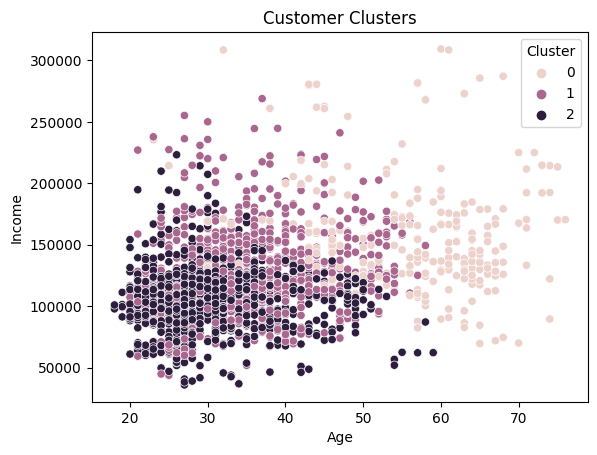

In [32]:
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=data)
plt.title('Customer Clusters')
plt.show()

Calculate the mean values for each column in the DataFrame data, grouped by the 'Cluster' column. The result is stored in the cluster_stats variable.

In [17]:
cluster_stats = data.groupby('Cluster').mean()

Print the mean values for each column in the cluster_stats DataFrame, representing the characteristics of each customer cluster.

In [18]:
print(cluster_stats)

                   ID       Sex  Marital status        Age  Education  \
Cluster                                                                 
0        1.000009e+08  0.483636        0.661818  55.665455   2.105455   
1        1.000008e+08  0.004657        0.129220  35.413271   0.703143   
2        1.000012e+08  0.897229        0.808314  30.127021   1.031178   

                Income  Occupation  Settlement size  
Cluster                                              
0        157936.381818    1.116364         1.090909  
1        126037.969732    0.945285         1.024447  
2        104168.264434    0.579677         0.344111  


Cluster 0:

* This cluster has a higher proportion of individuals who are predominantly male (48.4%) compared to other clusters.
The majority of individuals in this cluster are married (66.2%).
* The average age of individuals in this cluster is relatively higher (55.7), indicating that they are likely older customers.
* The education level in this cluster is higher, with an average education value of 2.1.
* The average income of individuals in this cluster is relatively higher (157,936.38).
* They are more likely to have an occupation (1.1) and reside in larger settlement sizes (1.09).


Cluster 1:

* This cluster has a significantly lower proportion of males (0.5%) compared to other clusters, indicating a predominantly female customer base.
* The majority of individuals in this cluster are unmarried (12.9%).
* The average age of individuals in this cluster is relatively lower (35.4), indicating a younger customer segment.
* The education level in this cluster is relatively lower, with an average education value of 0.7.
* The average income of individuals in this cluster is moderate (126,037.97).
* They are more likely to have an occupation (0.9) and reside in moderate settlement sizes (1.02).


Cluster 2:

* This cluster has a higher proportion of individuals who are predominantly male (89.7%) compared to other clusters.
The majority of individuals in this cluster are married (80.8%).
* The average age of individuals in this cluster is relatively lower (30.1), indicating a younger customer segment.
* The education level in this cluster is moderate, with an average education value of 1.0.
* The average income of individuals in this cluster is relatively lower (104,168.26).
* They are less likely to have an occupation (0.6) and reside in smaller settlement sizes (0.34).